In [164]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import seaborn as sns

from my_utils.my_utils import printMD

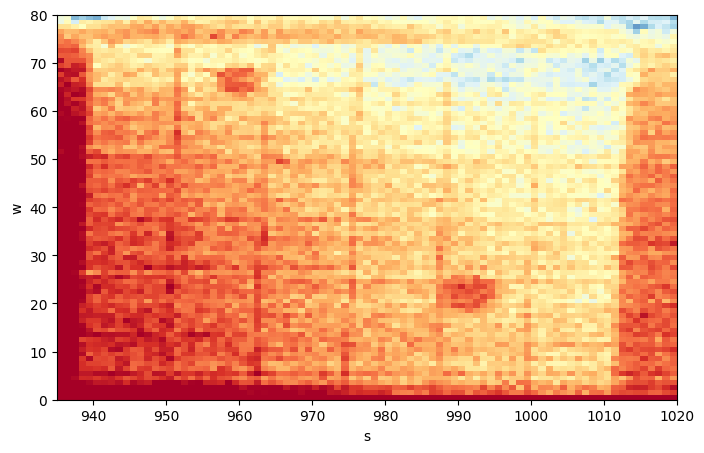

In [2]:
file = uproot.open("root_files/gopa3+-ped.root")
# hist_h = file["h7"].values()
w, x, y = file["h7"].to_numpy()
fig, ax = plt.subplots(figsize=(8, 5))
# w, x, y = hist_h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu", vmin=0, vmax=80)
ax.set_xlabel("s")
ax.set_ylabel("w")
ax.set_ylim(0, 80)
ax.set_xlim(935, 1020)
# fig.colorbar(mesh)
plt.show()

## Whole picture + rotation to 2.2 degrees

In [ ]:
file = uproot.open("root_files/gopa3+-ped.root")
w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=0, vmax=80)
ax.set_xlabel("s")
ax.set_ylabel("w")
ax.set_ylim(2, 75)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
plt.grid()
plt.show()

In [60]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

y = range(w_new.shape[0])   # Rows
x = range(w_new.shape[1])   # Columns

print(w_new.shape)

(400, 124)


## Plotting

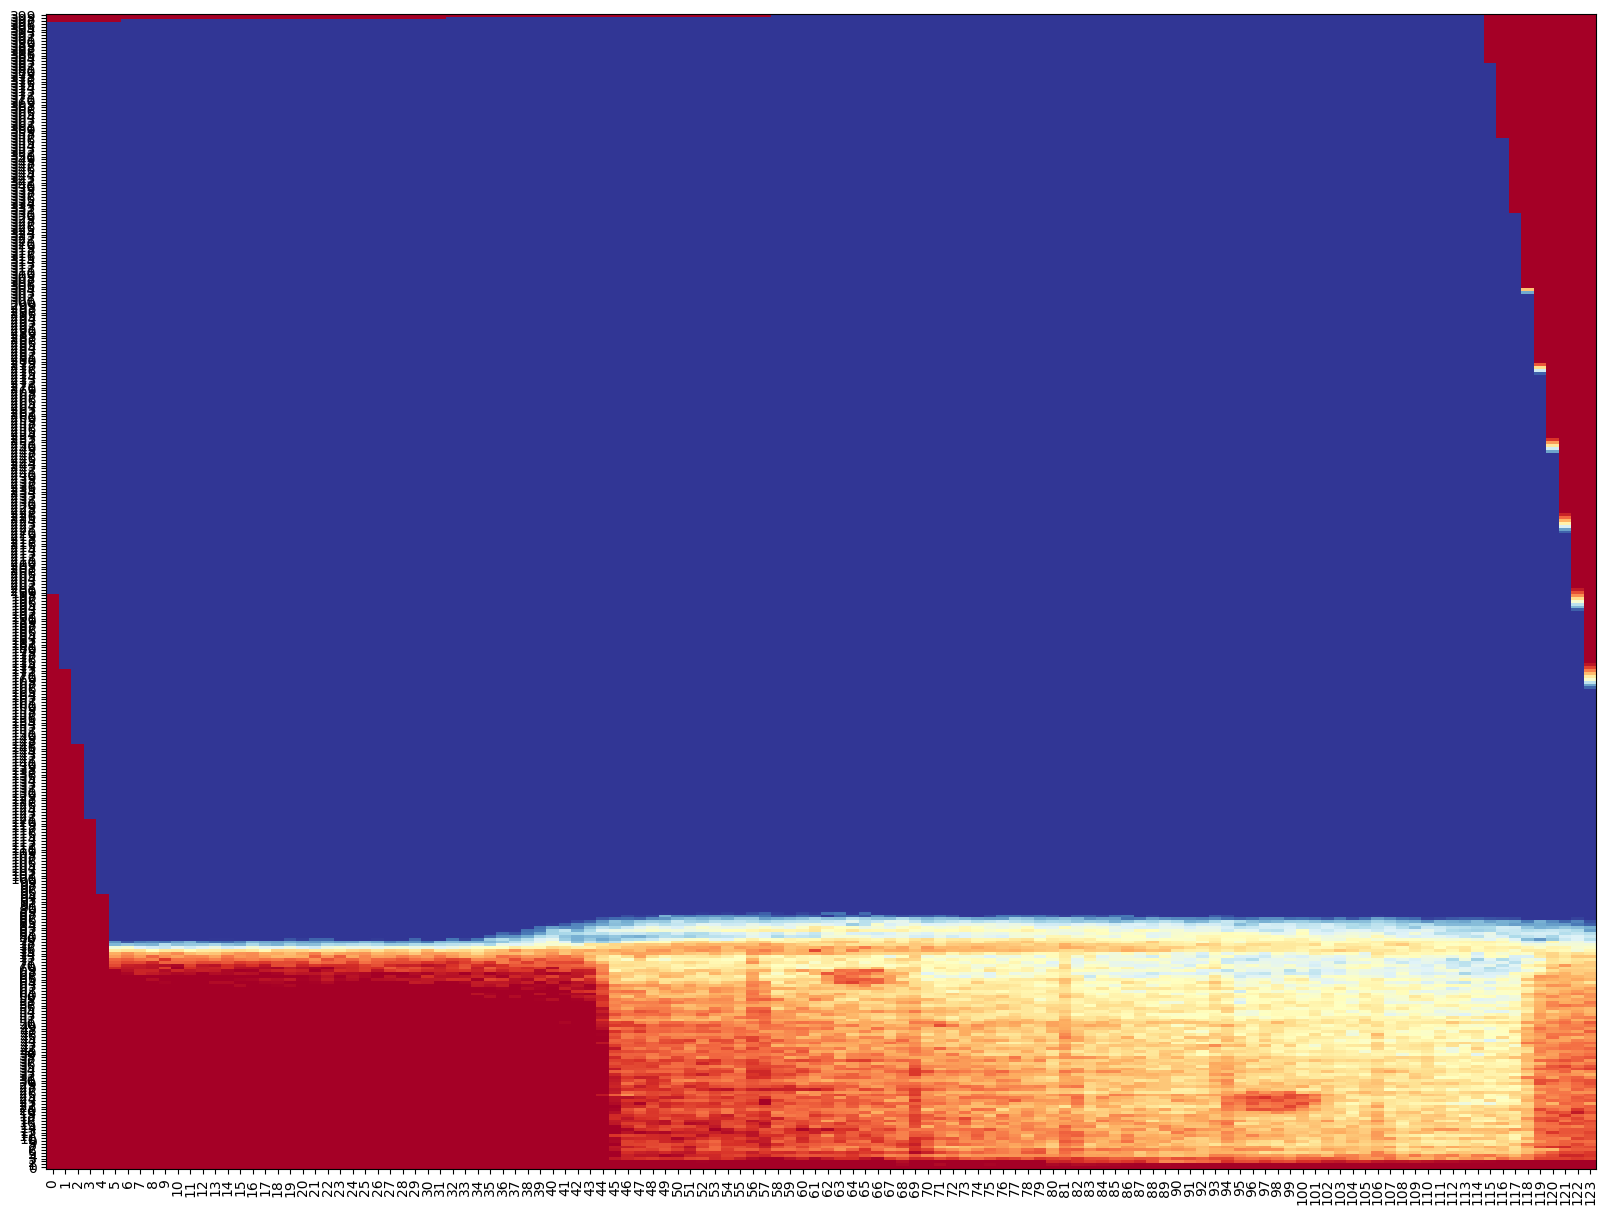

In [61]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.pcolormesh(x, y, w_new, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.show()

## Cropping out the grid part

### **With tungsten grade**

Box shape in bins: (73, 74)


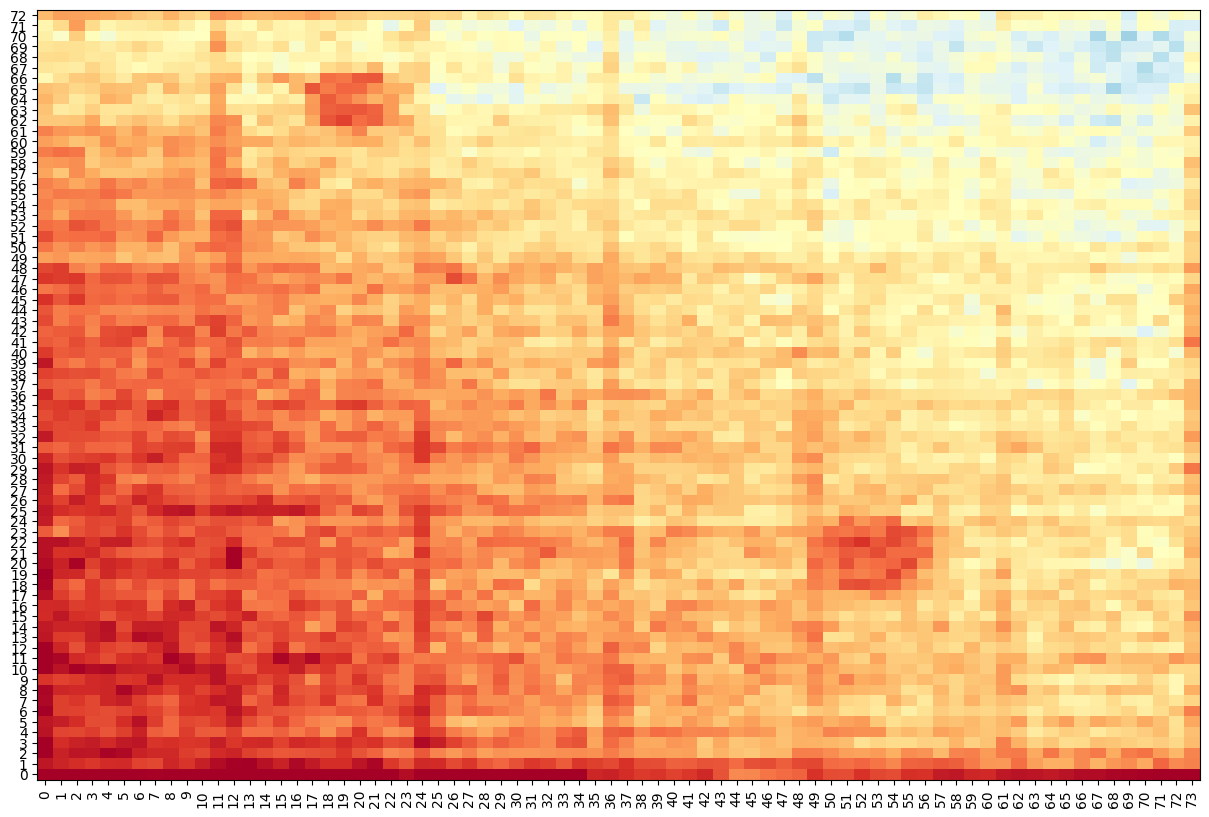

In [120]:
fig, ax = plt.subplots(figsize=(15, 10))
w_grade = w_new[2:75, 45:119]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **With tungsten grade**")
print("Box shape in bins:",w_grade.shape)
plt.show()

### **With tungsten grid**

Shape of summed matrix: (74,)


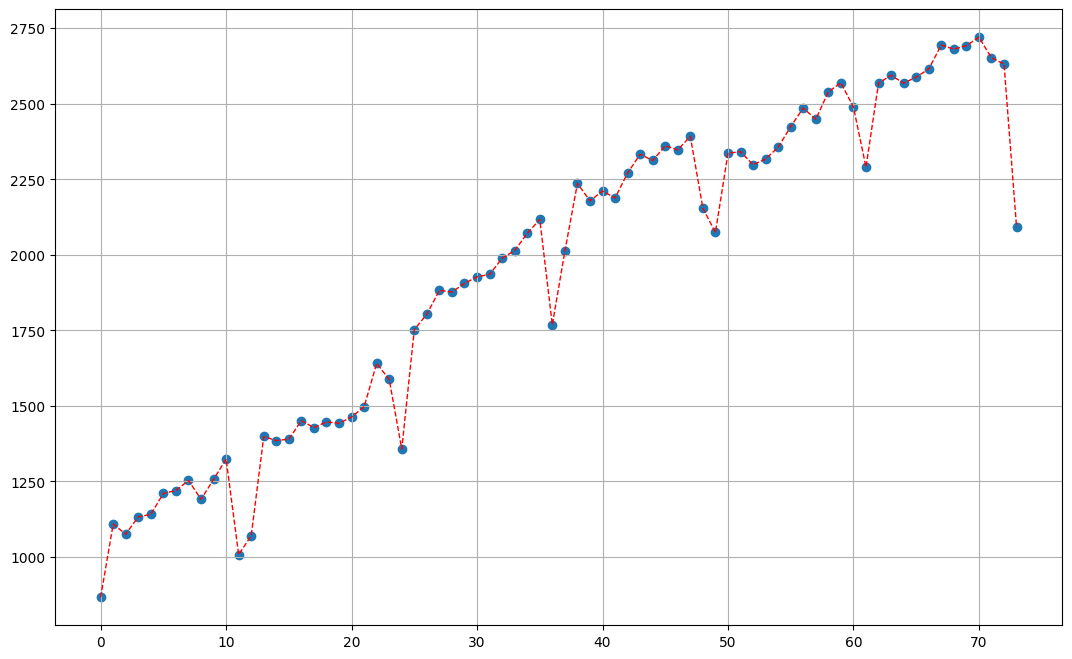

In [121]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_grade_summed = w_grade.sum(axis=_axis)
x_grade_summed = np.arange(len(w_grade_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_grade_summed, w_grade_summed)
ax.plot(x_grade_summed, w_grade_summed, '--', lw=1, c='r')
printMD("### **With tungsten grid**")
print("Shape of summed matrix:", w_grade_summed.shape)
plt.grid()
plt.show()

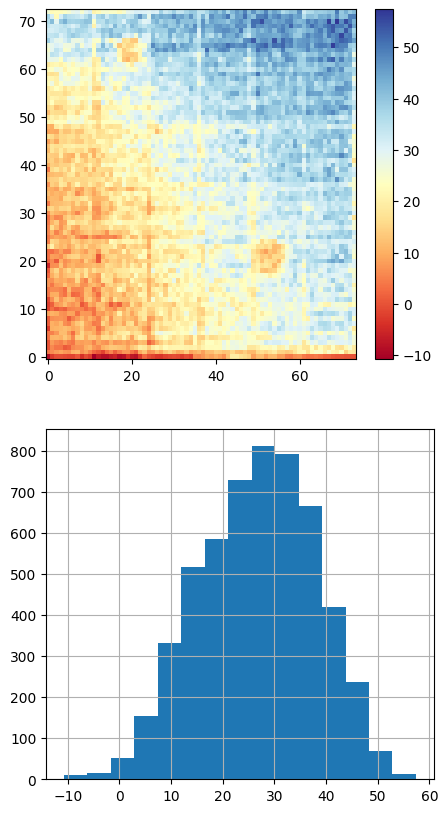

In [124]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_grade

mesh = ax[0].pcolormesh(np.arange(w_grade.shape[1]), np.arange(w_grade.shape[0]), w_grade, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_grade.ravel(), bins=15)
plt.grid()

plt.show()

## Bottom right marker

### **Right bottom marker with tungsten grid**

Box shape in bins: (8, 12)


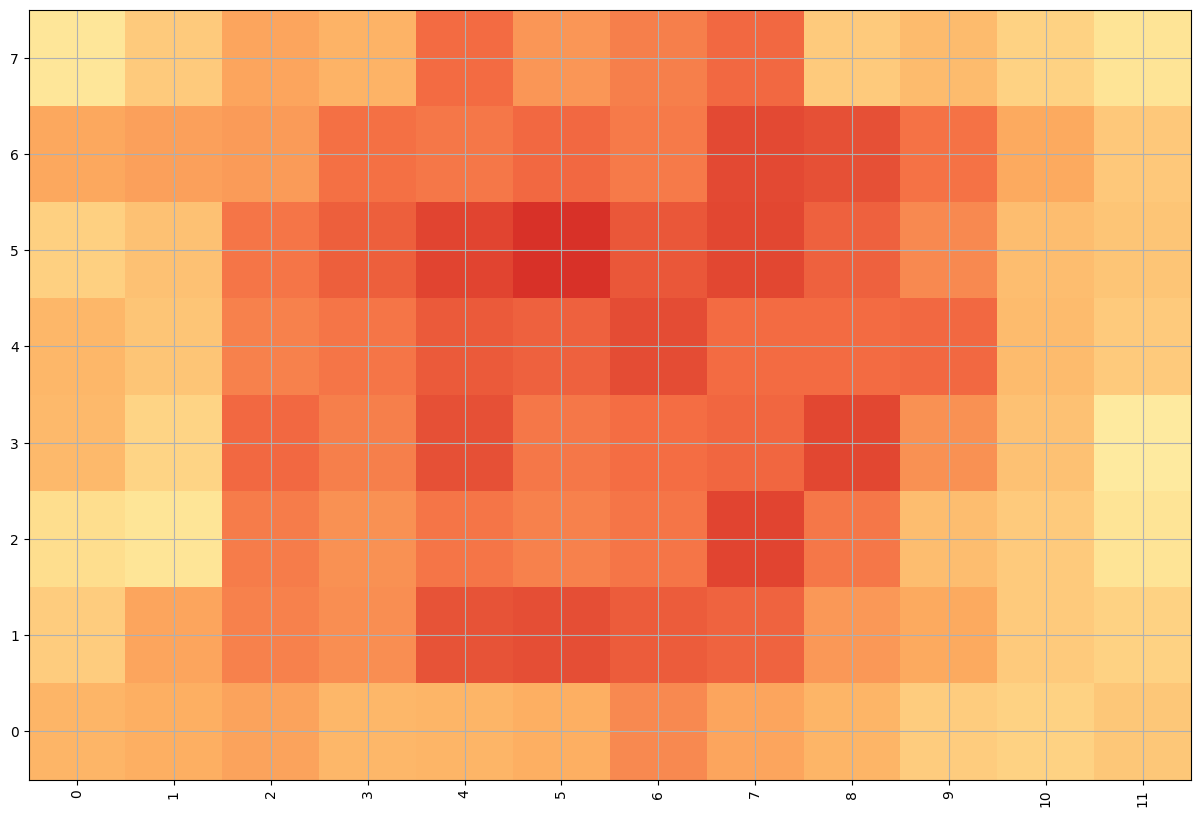

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
#                 Y     X
w_grade = w_new[19:27, 92:104]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **Right bottom marker with tungsten grid**")
print("Box shape in bins:", w_grade.shape)
plt.grid()
plt.show()

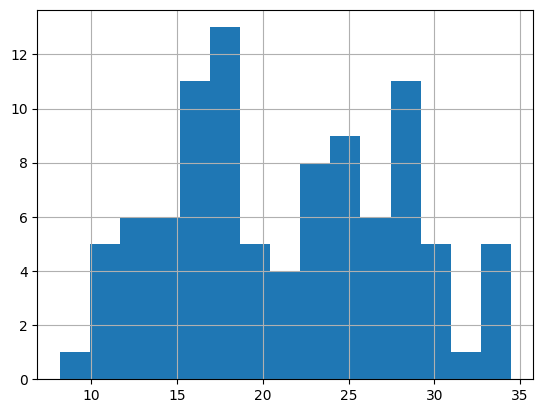

In [86]:
plt.hist(w_grade.ravel(), bins=15)
plt.grid()
plt.show()

[  3.89645617 -41.73207449 235.2733118 ]


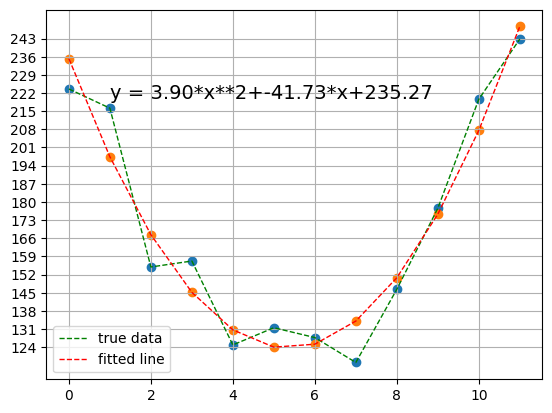

In [72]:
w_markers_cropped = w_new[19:27, 92:104]
w_markers_summed = w_markers_cropped.sum(axis=0)
#define data
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 220, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.yticks(np.arange(y_pred.min(), y_pred.max(), 7))
plt.legend()
plt.grid()
plt.show()

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [  3.89645617 -41.73207449 235.2733118 ]


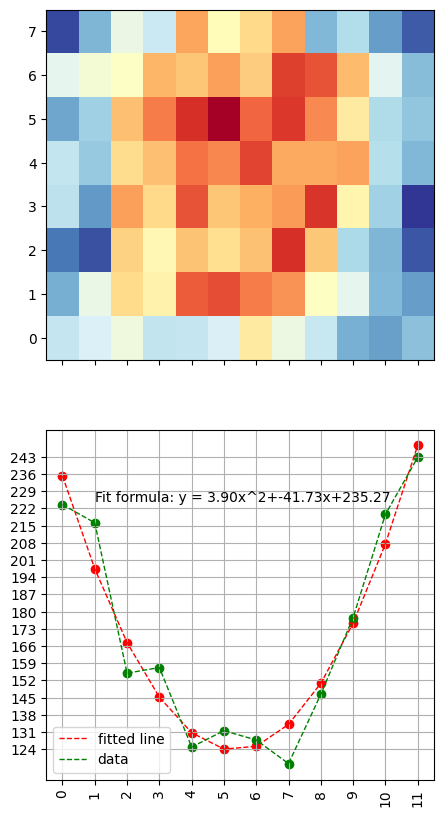

In [73]:

fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_new[19:27, 92:104]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(1, 225, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.yticks(np.arange(y_pred.min(), y_pred.max(), 7))
plt.legend()
plt.grid()
plt.show()

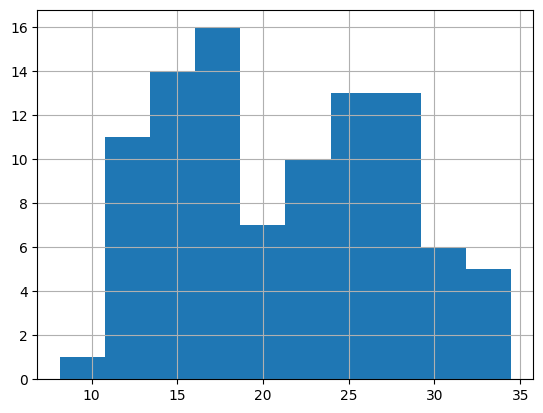

In [77]:
plt.hist(w_grade.ravel())
plt.grid()
plt.show()

## Top left marker

### **Top left marker with tungsten grid**

Box shape in bins: (8, 8)


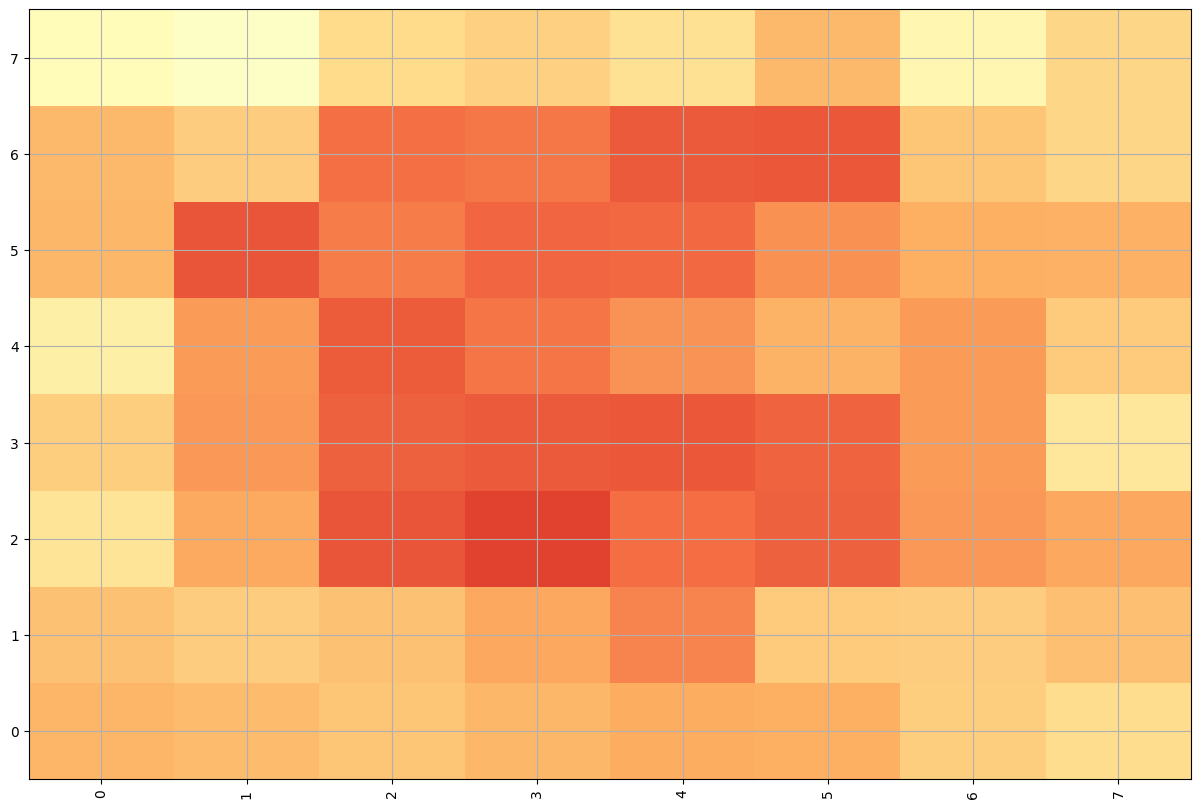

In [82]:
fig, ax = plt.subplots(figsize=(15, 10))
#                 Y     X
w_grade = w_new[62:70, 61:69]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **Top left marker with tungsten grid**")
print("Box shape in bins:",w_grade.shape)
plt.grid()
plt.show()

[  7.07437343 -49.72580819 240.49156125]


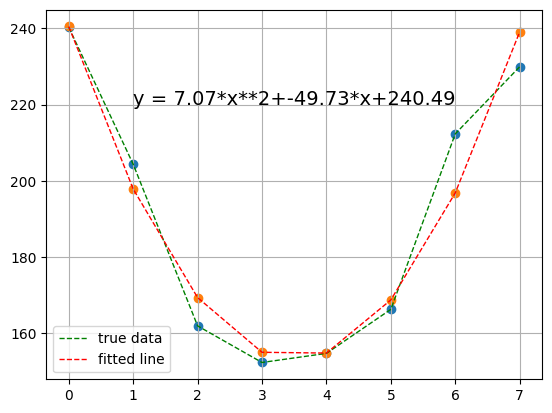

In [45]:
w_markers_cropped = w_grade
w_markers_summed = w_markers_cropped.sum(axis=0)
#define data
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 220, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.legend()
plt.grid()
plt.show()

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [  7.07437343 -49.72580819 240.49156125]


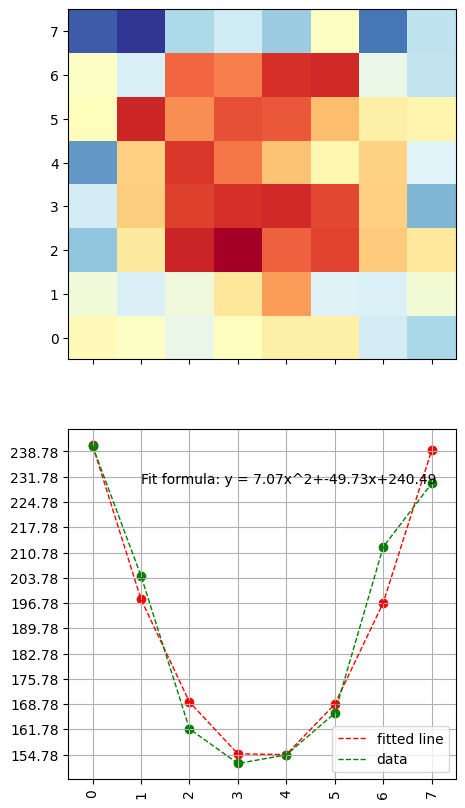

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_grade
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].text(1, 230, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.grid()
plt.yticks(np.arange(y_pred.min(), y_pred.max(), 7))
plt.show()

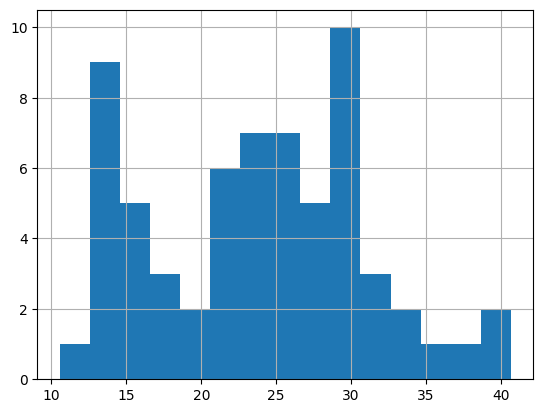

In [83]:
plt.hist(w_grade.ravel(), bins=15)
plt.grid()
plt.show()

## Histograms

### Left Marker

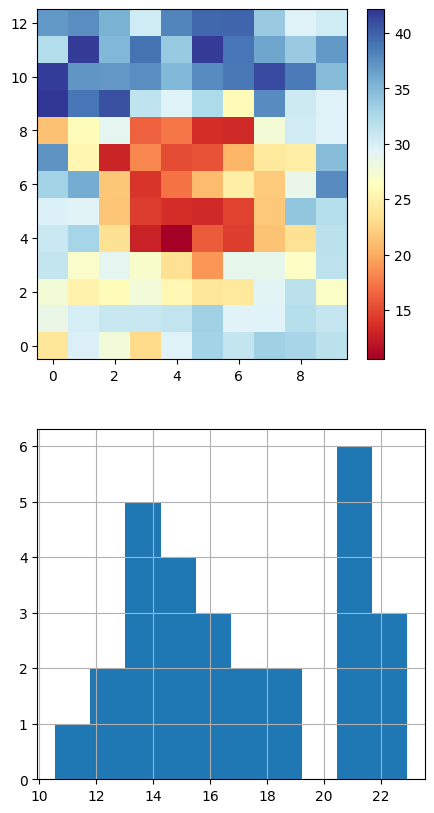

In [176]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_left = w_new[60:73, 60:70]

trsh = 23
# w_left = np.where(w_left<=trsh, w_left, w_left*4)
# w_left = w_left[w_left<100]
mesh = ax[0].pcolormesh(np.arange(w_left.shape[1]), np.arange(w_left.shape[0]), w_left, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_left[w_left<=trsh].ravel())
plt.grid()

plt.show()

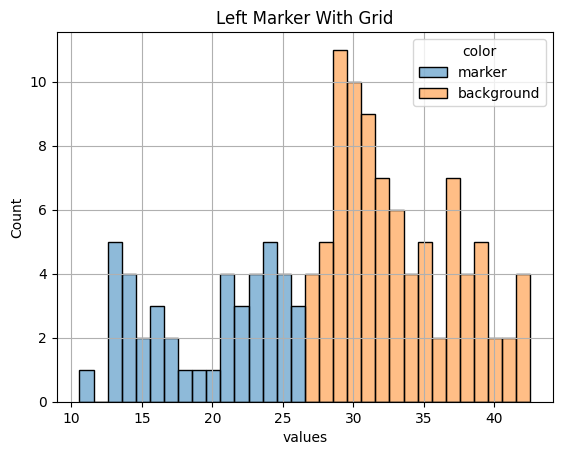

In [183]:
import pandas as pd
df_left = pd.DataFrame(w_left.ravel())
trsh=26
df_left['color'] = np.where(df_left[0]<=trsh, "marker", "background")
df_left.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_left, x="values", hue="color", binwidth=1)
plt.title("Left Marker With Grid")
plt.grid()
plt.show()

### Right Marker

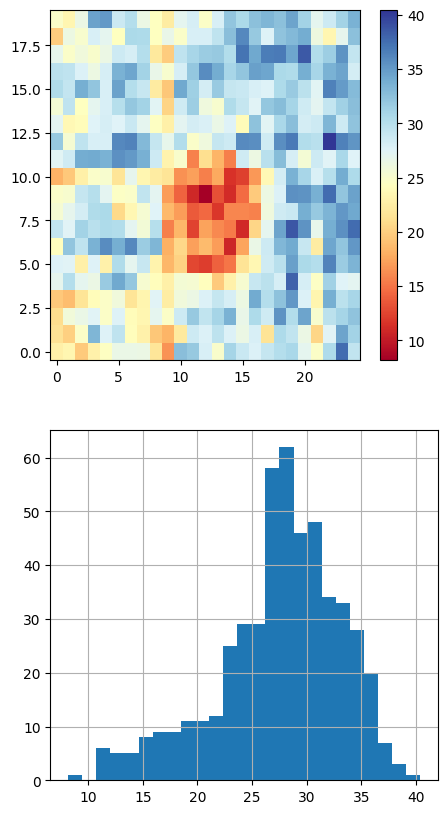

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_right = w_new[15:35, 85:110]

mesh = ax[0].pcolormesh(np.arange(w_right.shape[1]), np.arange(w_right.shape[0]), w_right, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_right.ravel(), bins=25)
plt.grid()

plt.show()

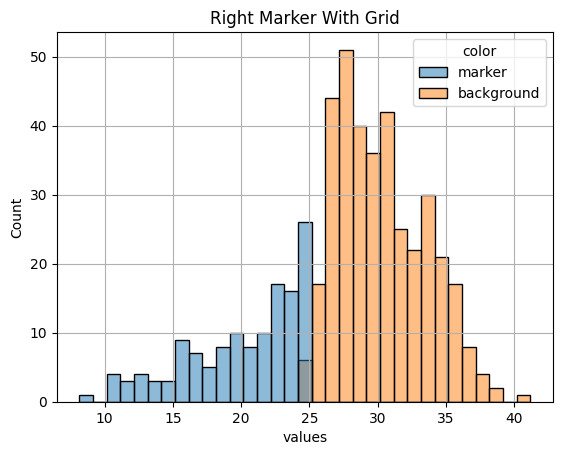

In [182]:
import pandas as pd
df_right = pd.DataFrame(w_right.ravel())
trsh=25
df_right['color'] = np.where(df_right[0]<=trsh, "marker", "background")
df_right.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_right, x="values", hue="color", binwidth=1)
plt.title("Right Marker With Grid")
plt.grid()
plt.show()